## Airbnb(New York City)
- 미국 NYC Airbnb 목록(2019)
- 프로젝트 목적: 가격 예측(price)
- 제공 데이터(3개): train.csv, test.csv, y_test(최종 채점용)
- 평가 방식: MSE (평균제곱오차/ 실제 값과 예측 값 차이 ->제곱해 평균)
- <참고> : 6. 지도학습(회귀) 노드의 6-8. 평가(회귀) 스텝에서 복습하실 수 있습니다.
- 데이터 출처 바로가기 / License CC0: Public Domain


### 목표 : MSE 51,000보다 낮게 측정하시오.
### 결과 : MSE 50104.65427118315

### 1. Baseline
라이브러리와 데이터 불러오기

In [62]:
# 라이브러리 
import pandas as pd

# 데이터 불러오기
train = pd.read_csv('/aiffel/data/train.csv')
test = pd.read_csv('/aiffel/data/test.csv')

## 2. EDA(탐색적 데이터 분석)

In [63]:
# 데이터 크기
train.shape, test.shape

((39116, 16), (9779, 15))

In [64]:
# 데이터 샘플
display(train.head(2))
display(test.head(2))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",33771081,Rémy,Brooklyn,Williamsburg,40.70959,-73.94652,Private room,3,2,2019-05-08,0.31,1,0
1,971247,Sunny Artist Live/Work Apartment,5308961,Larry,Manhattan,Upper West Side,40.79368,-73.96487,Entire home/apt,3,159,2019-07-03,2.09,1,244


In [65]:
# 데이터 타입
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   price                           39116 non-null  int64  
 10  minimum_nights                  39116 non-null  int64  
 11  number_of_reviews               39116 non-null  int64  
 12  last_review                     

In [66]:
# 결측치(train)
train.isnull().sum()

id                                   0
name                                12
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7994
reviews_per_month                 7994
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [67]:
# 결측치(train)
test.isnull().sum()

id                                   0
name                                 4
host_id                              0
host_name                            4
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       2058
reviews_per_month                 2058
calculated_host_listings_count       0
availability_365                     0
dtype: int64

<AxesSubplot:>

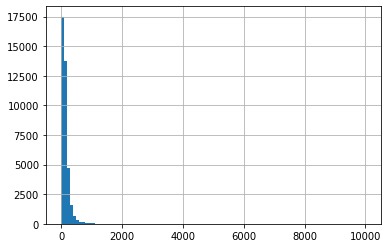

In [68]:
# target(hist)
train['price'].hist(bins=100)

In [69]:
# target(describe)
train['price'].describe()

count    39116.000000
mean       152.751150
std        241.752501
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [70]:
# 피처(host_id)
train['host_id'].value_counts()

219517861    256
107434423    181
30283594      99
137358866     82
12243051      80
            ... 
73369106       1
26620387       1
176660539      1
26004891       1
2609535        1
Name: host_id, Length: 30845, dtype: int64

## 3. 데이터 전처리

In [71]:
# 결측치 컬럼 삭제 (last_review)
train = train.drop('last_review', axis=1)
test = test.drop('last_review', axis=1)

In [72]:
# 결측치 채우기
train['reviews_per_month'] = train['reviews_per_month'].fillna(0)
test['reviews_per_month'] = test['reviews_per_month'].fillna(0)

In [73]:
# 결측치 확인
train.isnull().sum()

id                                 0
name                              12
host_id                            0
host_name                         17
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [74]:
# 가격 값 복사
target = train['price']
train = train.drop('price', axis=1)

In [75]:
# 수치형 피처 선택
cols = [
        'host_id',
        'latitude', 
        'longitude', 
        'minimum_nights',
        'number_of_reviews', 
        'reviews_per_month',
        'calculated_host_listings_count',
        'availability_365'
        ]

train = train[cols]
test = test[cols]


## 4. 검증 데이터 분리

In [76]:
# 검증 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=2022)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((31292, 8), (7824, 8), (31292,), (7824,))

## 5. 머신러닝

In [77]:
# 머신러닝(회귀)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

32000.4623726053

In [78]:
# Xgboost
from xgboost import XGBRegressor
model = XGBRegressor(random_state=2022)

model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)


31838.531510528188

In [79]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=2022)
model.fit(X_train, y_train)

pred = model.predict(X_val)
mean_squared_error(y_val, pred)

31446.66249631902

## 6. 채점

In [80]:
#채점
# test 데이터 예측 및 평가
y_test = pd.read_csv('/aiffel/data/y_test.csv')

# 랜더포레스트
pred = model.predict(test)
mean_squared_error(y_test, pred)

50104.65427118315

## 7. 회고
- 솔직히 잘 모르겠다.
- 강의를 여러번 돌려보며 알고리즘을 순서대로 나열도 해보고 비교도 해 보았지만, 내가 이렇게 분석을 했구나 하는 느낌은 아니라서 조금 막막했다.
- 가능성이라면 여러번 순서대로 따라하다보니 무언가 결과가 나오긴 했다는 것이다. 여기에 큰 의미를 부여한다.
- 수학적 개념이 잡혀 있지 않아서 더 어렵게 느껴진다

### MSE란?
MSE는 "Mean Squared Error"의 약자이며 회귀 모델의 성능을 평가하기 위해 기계 학습에서 일반적으로 사용되는 메트릭입니다. 예측 값과 실제 값 사이의 제곱 차이의 평균을 측정합니다.


MSE를 계산하려면 각 데이터 요소에 대한 예측 값과 실제 값의 차이를 구하고 그 차이를 제곱한 다음 모든 제곱 차이의 평균을 구합니다. 수학적 표기법에서 MSE는 다음과 같이 나타낼 수 있습니다.


MSE = (1/n) * Σ (y - ŷ)²


어디:
- n은 총 데이터 포인트 수입니다.
- y는 대상 변수의 실제 값입니다.
- ŷ는 목표변수의 예측값

차이 제곱 (y - ŷ)²이 절대 차이 |y - ŷ| 대신 사용됩니다. 큰 오류에 더 많은 벌칙을 부여하고 양수 및 음수 오류의 취소를 방지하는 데 도움이 되기 때문입니다. 오류를 제곱함으로써 메트릭은 모든 오류가 총 오류에 긍정적으로 기여하도록 합니다.


MSE가 낮을수록 예측 값이 실제 값에 더 가깝다는 의미이므로 모델의 성능이 더 우수함을 나타냅니다. 그러나 이상치에 대한 제곱 차이가 매우 커서 결과가 왜곡될 수 있으므로 MSE는 이상치에 민감하다는 점에 유의해야 합니다. 따라서 모델의 성능을 평가할 때 다른 메트릭 및 평가 기술과 함께 사용해야 합니다.

